In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
matplotlib.use('Agg')

In [4]:
df = pd.read_csv("/python/csv/ManchesterCity_Year.csv")

**pandasのデータちょっと使いやすく改造**

In [5]:
# 勝率
rateWin = []
for i in range(len(df)):
  rateWin.append( (float(df['Overall :Wins'][i])) / (float(df['Overall :Matches'][i])) )
df['RateWin'] = rateWin

# ゴールと 被ゴール
goals = []
enemyGoals = []
for i in range(len(df)):
  goals.append(float(df['Overall :Goals'].values[i].split(':')[0]))
  enemyGoals.append(float(df['Overall :Goals'].values[i].split(':')[1]))
df['Goals'] = goals
df['EnemyGoals'] = enemyGoals

**今回の説明と目的はこれ**

In [6]:
X = np.array(goals) - np.array(enemyGoals)
Y = np.array(rateWin)
print(X)
print(Y)

[ 51.  67.  72.  79.  41.  30.  45.  65.  32.  64.  27.  28.   8.  -8.
 -15.  -5.   8.   1.  -7.  56. -24.  38. -25. -11. -11.   5.  13.  11.
  -9. -21. -14. -23.  -1.  -3. -22.   2.  23.  26.  18.   0.  -7.  -3.
  32.   5.   7.   9.  43.  -9.]
[0.71052632 0.68421053 0.84210526 0.84210526 0.60526316 0.5
 0.63157895 0.71052632 0.60526316 0.73684211 0.55263158 0.47368421
 0.39473684 0.39473684 0.28947368 0.34210526 0.34210526 0.23684211
 0.39473684 0.67391304 0.21052632 0.56521739 0.23684211 0.28571429
 0.21428571 0.35714286 0.47619048 0.44736842 0.31578947 0.19047619
 0.26190476 0.30952381 0.35714286 0.33333333 0.28571429 0.30952381
 0.47619048 0.5        0.38095238 0.42857143 0.33333333 0.35714286
 0.54761905 0.28571429 0.38095238 0.35714286 0.61904762 0.28571429]


**グラフを描画する関数**

In [36]:
# グラフのプロットする関数
def show_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100) #グラフの解像度（dpi）
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')  #xy軸の値とどうかくか…いまは赤線
    ax.set_title('タイトル')
    ax.set_xlabel('説明変数')
    ax.set_ylabel('目的変数')
    # ax.set_xlim(xmin, xmax)
    # ax.set_ylim(ymin, ymax)
    ax.grid()
    # fig.show() #なんかこれ書いたらエラー出た

## 回帰をやってく

[0.0058243  0.35552807]
平均二乗残差0.00225645065089037


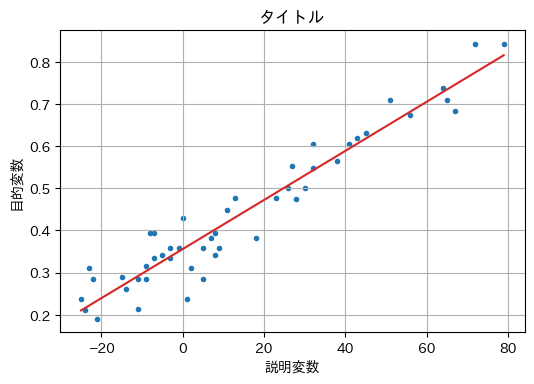

In [37]:
d = 1
W = np.polyfit(X, Y, d)
print(W) #=>array([0.0425689 , 0.75295276])
x = np.linspace(min(X), max(X), 100)
y_hat = np.polyval(W, x)
show_graph(X, Y, x, y_hat)
print('平均二乗残差' + str(np.mean((Y - np.polyval(W, X)) ** 2)))

LinearRegression()
傾き: [0.0058243]
切片: 0.3555280696774532
決定係数: 0.9213223030210831


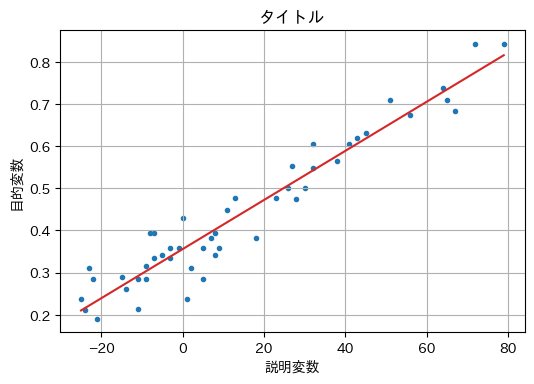

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
print(reg.fit(X.reshape(-1, 1), Y)) #=>LinearRegression()
print('傾き: ' + str(reg.coef_)) #=>回帰直線の係数（傾き）　array([0.0425689])
print('切片: ' + str(reg.intercept_)) #=>回帰直線の切片　 0.7529527559055118
print('決定係数: ' + str(reg.score(X.reshape(-1, 1), Y))) #=>決定係数を求めるため、score関数を呼び出す　 0.02620789783394495

x = np.linspace(min(X), max(X), 100)
y_hat = reg.predict(x.reshape(-1, 1))
show_graph(X, Y, x, y_hat)

### 重回帰（三次）

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
傾き: [0.00000000e+00 5.15740853e-03 1.43982124e-05]
切片: 0.35091356592864076
決定係数: 0.9257557009615212


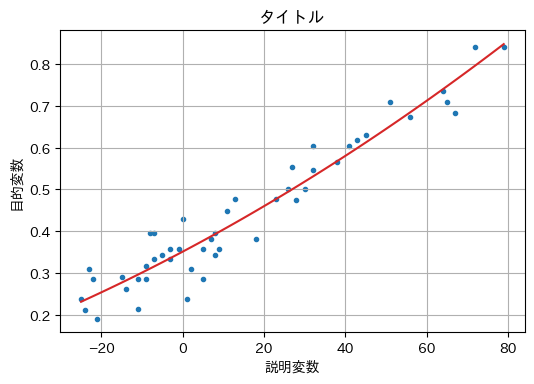

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
print(reg.fit(X.reshape(-1, 1), Y)) #=>Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),('linearregression', LinearRegression())])
print('傾き: ' + str(reg[1].coef_)) #=>array([ 0.        ,  0.22739303, -0.00557272])
print('切片: ' + str(reg[1].intercept_)) #=>-0.6178680668231764
print('決定係数: ' + str(reg.score(X.reshape(-1, 1), Y))) #=>0.04476430662095232

x = np.linspace(min(X), max(X), 100)
y_hat = reg.predict(x.reshape(-1, 1))
show_graph(X, Y, x, y_hat)

### 下の式の通りにwを求めて、楽をせずにちゃんとやってみた
\begin{align}
\pmb{w} &= (\pmb{X}^\top \pmb{X})^{-1}\pmb{X}^\top \pmb{y}\\
\pmb{w} &= (\pmb{X}^\top \pmb{X} + \alpha \pmb{I})^{-1}\pmb{X}^\top \pmb{y}
\end{align}

[[0.35552807]
 [0.0058243 ]]
リッジ回帰↓、しかもmatrixをつかってみた
[[0.34641001]
 [0.00595694]]


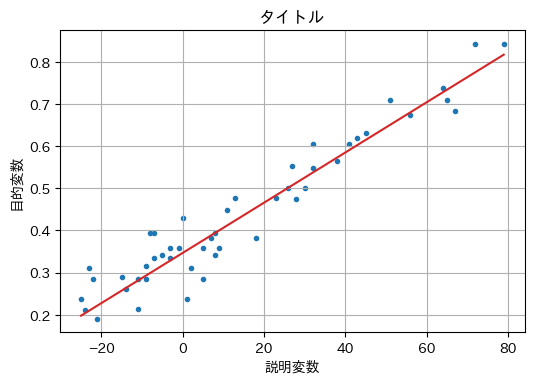

In [40]:
d = 2
# listは.Tできないらしいからnp.arrayにした。
dmX = np.array([[X[i]**j for j in range(d)] for i in range(len(X))])  # design matrix
dmY = Y.reshape(len(Y), 1)

print((np.linalg.inv(dmX.T @ dmX) @ dmX.T) @ dmY)

print('リッジ回帰↓、しかもmatrixをつかってみた')
alpha = 1
def W(alpha):
  return np.array((np.matrix(dmX).T @ dmX + alpha * np.eye(d)) ** (-1) @ np.matrix(dmX).T) @ dmY
def yHat(x, alpha):
  return sum([W(alpha)[i] * x**i for i in range(d)])
x = np.linspace(min(X), max(X), 100)
y_hat = yHat(x,alpha)
print(W(alpha))
show_graph(X, Y, x, y_hat)

In [41]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X.reshape(-1, 1),Y)
print(model.coef_, model.intercept_)

[0.00582414] 0.35553030242247613


### 楽をして三次回帰しちゃう

In [42]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

In [43]:
rng.randn(n_samples)

array([-0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.0519454 ])

In [44]:
rng.randn(n_samples, n_features)

array([[ 0.72909056,  0.12898291,  1.13940068, -1.23482582,  0.40234164],
       [-0.68481009, -0.87079715, -0.57884966, -0.31155253,  0.05616534],
       [-1.16514984,  0.90082649,  0.46566244, -1.53624369,  1.48825219],
       [ 1.89588918,  1.17877957, -0.17992484, -1.07075262,  1.05445173],
       [-0.40317695,  1.22244507,  0.20827498,  0.97663904,  0.3563664 ],
       [ 0.70657317,  0.01050002,  1.78587049,  0.12691209,  0.40198936],
       [ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341],
       [ 1.94362119, -0.41361898, -0.74745481,  1.92294203,  1.48051479],
       [ 1.86755896,  0.90604466, -0.86122569,  1.91006495, -0.26800337],
       [ 0.8024564 ,  0.94725197, -0.15501009,  0.61407937,  0.92220667]])

In [45]:
from sklearn.linear_model import Ridge
reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
print(reg.fit(X.reshape(-1, 1), Y))
clf = Ridge(alpha=1.0)
clf.fit(X, Y)

ValueError: Found input variables with inconsistent numbers of samples: [50, 48]

In [46]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [47]:
n_samples, n_features = 10, 5
aaaa = rng.randn(n_samples)
aaa = rng.randn(n_samples, n_features)

In [48]:
aaaa

array([ 0.37642553, -1.09940079,  0.29823817,  1.3263859 , -0.69456786,
       -0.14963454, -0.43515355,  1.84926373,  0.67229476,  0.40746184])

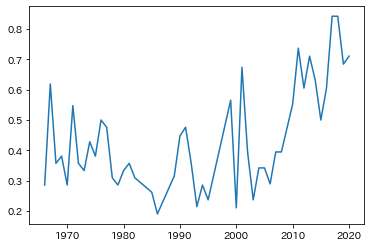

In [50]:
plt.plot(df['Unnamed: 0'],rateWin)
# plt.show()